Importing the Dependencies

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import pickle

Data Collection and Processing

In [93]:
cancer_data = pd.read_csv('/content/survey lung cancer.csv')

In [94]:

cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [95]:
cancer_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [96]:
cancer_data.shape

(309, 16)

In [97]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [98]:
cancer_data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [99]:
cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [100]:
cancer_data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [101]:
X = cancer_data.drop(columns='LUNG_CANCER', axis=1)
Y = cancer_data['LUNG_CANCER']

In [102]:
print(X)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [103]:
print(Y)

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object


Splitting the Data into Training data & Test Data

In [104]:
categorical_features = ['GENDER']
encoder = OrdinalEncoder()

X[categorical_features] = encoder.fit_transform(X[categorical_features])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Model Training

In [105]:
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy Score

In [106]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 93.93%


In [107]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 93.55%


In [108]:
X_test_prediction = model.predict(X_test)

CONFUSION MATRIX

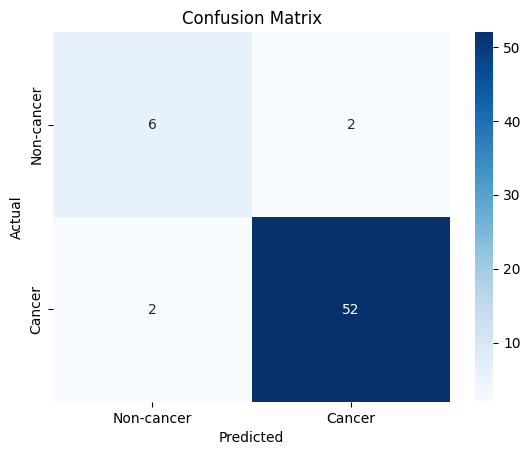

In [109]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(Y_test, X_test_prediction)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-cancer', 'Cancer'],
            yticklabels=['Non-cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [110]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

          NO       0.75      0.75      0.75         8
         YES       0.96      0.96      0.96        54

    accuracy                           0.94        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.94      0.94      0.94        62



Building a Predictive System

In [111]:
import pandas as pd

# Assuming `model` is your trained classification model

# Input data matching the dataset structure
input_data = ('M', 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2)

# Create a DataFrame for the input data with the proper column names
input_data_df = pd.DataFrame(
    [input_data],
    columns=[
        'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
        'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
        'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
    ]
)

# Strip extra whitespace from column names in input_data_df
input_data_df.columns = input_data_df.columns.str.strip()

# Encoding the 'GENDER' column (assuming the model expects encoded values)
gender_encoder = {'M': 1, 'F': 0}  # Example mapping
input_data_df['GENDER'] = input_data_df['GENDER'].map(gender_encoder)

# Ensure feature names in training data are also stripped of whitespace
model.feature_names_in_ = [name.strip() for name in model.feature_names_in_]

# Make the prediction
prediction = model.predict(input_data_df)

# Print the result
print(f"The person has Diabetes disease: {prediction[0]}")


The person has Diabetes disease: YES


                    Logistic Regression

In [77]:
model2 = LogisticRegression()

In [78]:
# training the LogisticRegression model with Training data
model2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

ACCURACY SCORE & CONFUSION MATRIX



Accuracy Score

In [79]:
# accuracy on training data
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 93.52%


In [80]:
# accuracy on test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 93.55%


CONFUSION MATRIX

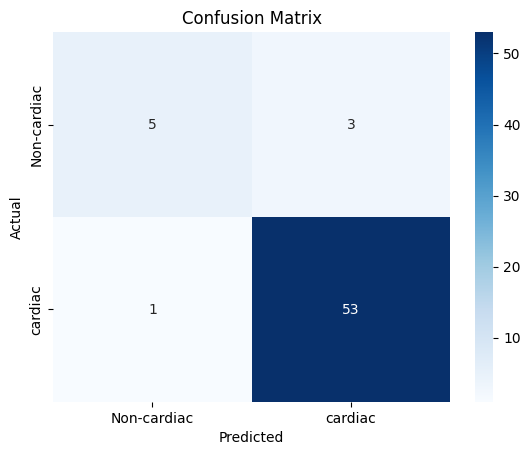

In [81]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-cancer', 'Cancer'],
            yticklabels=['Non-cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [82]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

          NO       0.83      0.62      0.71         8
         YES       0.95      0.98      0.96        54

    accuracy                           0.94        62
   macro avg       0.89      0.80      0.84        62
weighted avg       0.93      0.94      0.93        62



Building a Predictive System

In [84]:
import pandas as pd

# Assuming `model` is your trained classification model

# Input data matching the dataset structure
input_data = ('M', 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2)

# Create a DataFrame for the input data with the proper column names
input_data_df = pd.DataFrame(
    [input_data],
    columns=[
        'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
        'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
        'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
    ]
)

# Strip extra whitespace from column names in input_data_df
input_data_df.columns = input_data_df.columns.str.strip()

# Encoding the 'GENDER' column (assuming the model expects encoded values)
gender_encoder = {'M': 1, 'F': 0}  # Example mapping
input_data_df['GENDER'] = input_data_df['GENDER'].map(gender_encoder)

# Ensure feature names in training data are also stripped of whitespace
model.feature_names_in_ = [name.strip() for name in model.feature_names_in_]

# Make the prediction
prediction = model.predict(input_data_df)

# Print the result
print(f"The person has Diabetes disease: {prediction[0]}")


The person has Diabetes disease: YES


Gradient Boosting

In [85]:
model3 = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, max_features=None)

In [86]:
# training the GB model with training data
model3.fit(X_train, Y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=200)

Model Evaluation

Accuracy Score

In [112]:
# accuracy score on training data
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 99.60%


In [113]:
# accuracy score on testing data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of test data: {formatted_accuracy}')

Accuracy score of test data: 90.32%


Confusion matrix

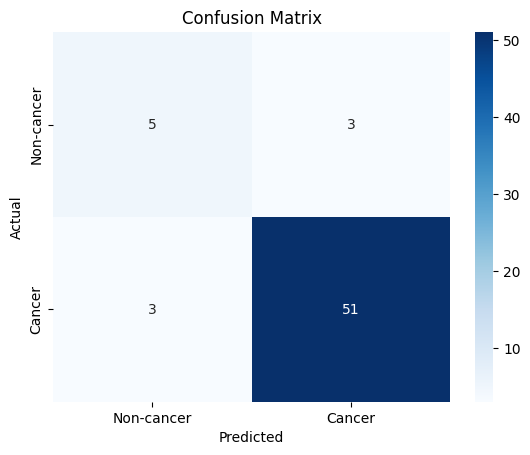

In [114]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-cancer', 'Cancer'],
            yticklabels=['Non-cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [115]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

          NO       0.62      0.62      0.62         8
         YES       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



Building a Predictive System

In [116]:
import pandas as pd

# Assuming `model` is your trained classification model

# Input data matching the dataset structure
input_data = ('M', 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2)

# Create a DataFrame for the input data with the proper column names
input_data_df = pd.DataFrame(
    [input_data],
    columns=[
        'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
        'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
        'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
    ]
)

# Strip extra whitespace from column names in input_data_df
input_data_df.columns = input_data_df.columns.str.strip()

# Encoding the 'GENDER' column (assuming the model expects encoded values)
gender_encoder = {'M': 1, 'F': 0}  # Example mapping
input_data_df['GENDER'] = input_data_df['GENDER'].map(gender_encoder)

# Ensure feature names in training data are also stripped of whitespace
model.feature_names_in_ = [name.strip() for name in model.feature_names_in_]

# Make the prediction
prediction = model.predict(input_data_df)

# Print the result
print(f"The person has Diabetes disease: {prediction[0]}")


The person has Diabetes disease: YES
